# Day 08. Exercise 01
# Binary classifier. SVM. Decision tree

## 0. Imports

In [51]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Preprocessing and logreg visualization

Read the file `am_pm.csv` to a dataframe from the previous exercise.

1. Draw a plot where the x-axis is `am`, the y-axis is `pm`, dots are the days, color depends on the target.
2. Add the decision boundary of logistic regression to the plot.
3. Draw the same plot (with the boundary), but the color should depend this time on the predictions.

Now it should be clear for you how the logistic regression works.

In [2]:
path = '/content/drive/My Drive/data/am_pm.csv' 
df = pd.read_csv(path)
df

,date,am,pm,target,predict
0,2020-04-17,21,2,working_day,weekend
1,2020-04-18,1,68,weekend,working_day
2,2020-04-19,18,15,weekend,working_day
3,2020-04-20,2,23,working_day,working_day
4,2020-04-21,0,25,working_day,working_day
5,2020-04-22,0,28,working_day,working_day
6,2020-04-23,10,33,working_day,working_day
7,2020-04-24,2,14,working_day,working_day
8,2020-04-25,30,74,weekend,working_day
9,2020-04-26,28,233,weekend,working_day


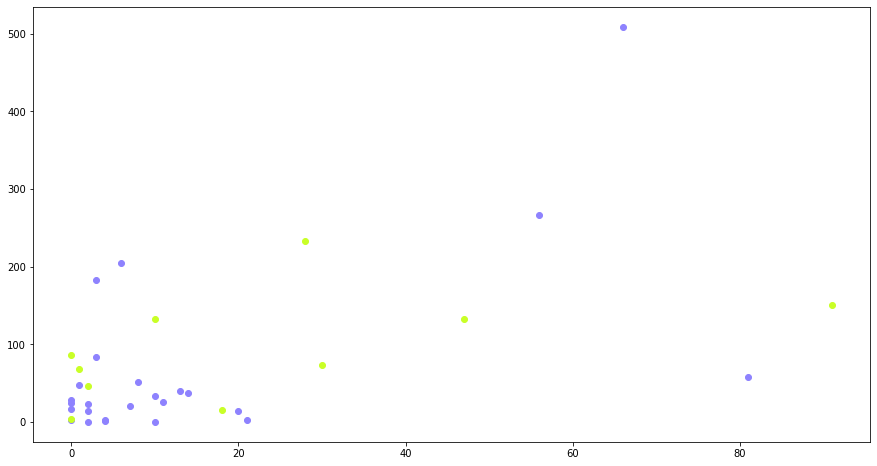

In [3]:
df_wd = df[df['target'] == 'working_day']
df_weekend = df[df['target'] == 'weekend']
plt.subplots(figsize=(15, 8))
plt.scatter(df_wd.am, df_wd.pm, color='xkcd:periwinkle')
plt.scatter(df_weekend.am, df_weekend.pm, color='xkcd:green yellow')
plt.show()

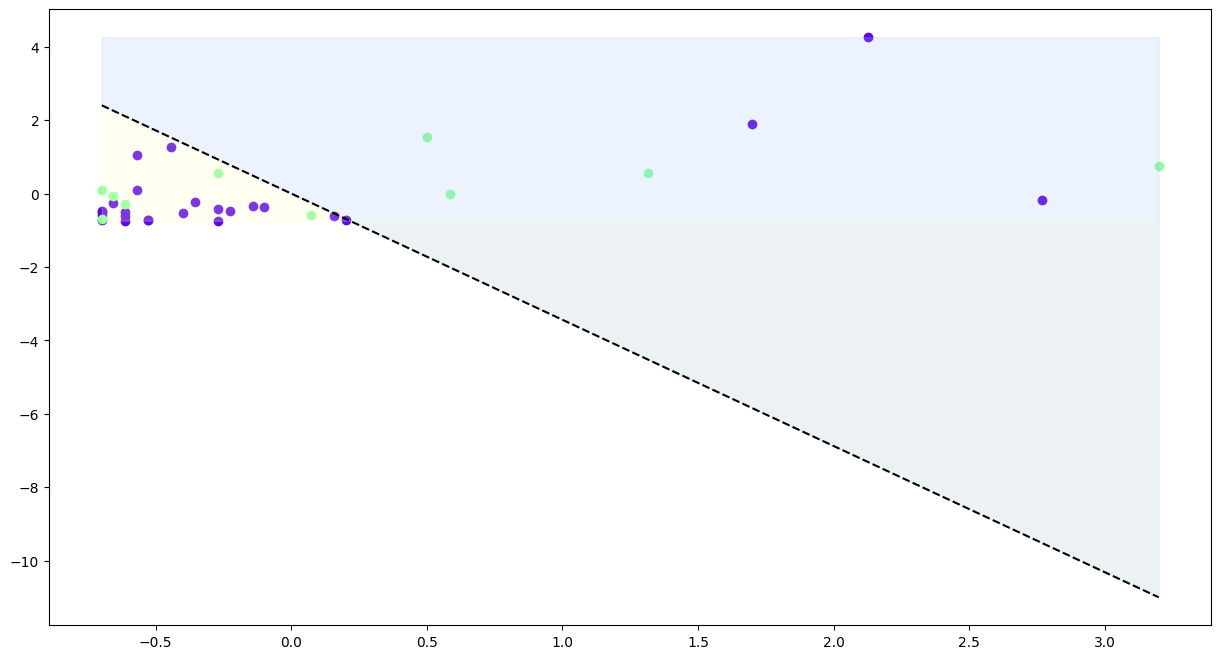

In [18]:
plt.subplots(figsize=(15, 8))

df_wd = df[df['target'] == 'working_day']
df_weekend = df[df['target'] == 'weekend']

X = df[['am', 'pm']]
y = df.target
logreg = LogisticRegression(fit_intercept=False, random_state=21)
logreg.fit(X,y)

b = logreg.intercept_[0]
w1, w2 = logreg.coef_.T
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary.
xmin, xmax = min(X.am), max(X.am)
ymin, ymax = min(X.pm), max(X.pm)
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', ls='--')
plt.scatter(df_wd.am, df_wd.pm, color='xkcd:blue violet')
plt.scatter(df_weekend.am, df_weekend.pm, color='xkcd:mint green')
plt.fill_between(xd, yd, ymin, color='xkcd:cream', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='xkcd:pastel blue', alpha=0.2)

plt.show()

## 2. Standardizing and logreg

Linear models can be sensitive to the scale of your variables. You make it easier for them to find the optimal solution when you scale your features.

1. Apply `StandardScaler` to `X` and train logistic regression again with the same parameters.
2. Calculate `accuracy` for the new model. Did it get better than a naive classifier with the most popular class?
3. Draw the plots that were described above but for the new model.

In [19]:
X = df[['am', 'pm']]
y = df.target

In [20]:
scaler = StandardScaler()
scaled = scaler.fit_transform(X)
scaled

array([[ 0.20069005, -0.71990365],
       [-0.65591383, -0.07182203],
       [ 0.07219947, -0.59225121],
       [-0.61308363, -0.51369586],
       [-0.69874402, -0.49405703],
       [-0.69874402, -0.46459877],
       [-0.27044208, -0.41550168],
       [-0.61308363, -0.60207063],
       [ 0.5861618 , -0.01290552],
       [ 0.50050141,  1.54838202],
       [-0.52742324, -0.71990365],
       [-0.52742324, -0.72972307],
       [-0.69874402, -0.57261237],
       [-0.1419515 , -0.34676575],
       [-0.35610247, -0.22893273],
       [ 3.19880362,  0.7431897 ],
       [ 1.31427509,  0.56644017],
       [-0.22761189, -0.48423761],
       [ 2.77050168, -0.17001622],
       [-0.61308363, -0.73954249],
       [-0.09912131, -0.36640459],
       [-0.57025344,  0.08528866],
       [-0.69874402,  0.1049275 ],
       [-0.27044208,  0.56644017],
       [-0.57025344,  1.05741109],
       [ 1.69974683,  1.88224224],
       [-0.44176286,  1.2734383 ],
       [ 2.12804877,  4.25854152],
       [-0.27044208,

In [21]:
df[['am', 'pm']] = scaled

In [22]:
logreg = LogisticRegression(fit_intercept=False, random_state=21)
X = df[['am', 'pm']]
y = df.target
logreg.fit(X, y)
y_scaled = logreg.predict(X)
y_scaled

array(['working_day', 'working_day', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day', 'working_day',
       'weekend', 'weekend', 'working_day', 'working_day', 'working_day',
       'working_day', 'working_day', 'weekend', 'weekend', 'working_day',
       'weekend', 'working_day', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day', 'weekend',
       'working_day', 'weekend', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day', 'working_day',
       'working_day'], dtype=object)

In [23]:
df['predict'] = y_scaled
df

,date,am,pm,target,predict
0,2020-04-17,0.200690,-0.719904,working_day,working_day
1,2020-04-18,-0.655914,-0.071822,weekend,working_day
2,2020-04-19,0.072199,-0.592251,weekend,working_day
3,2020-04-20,-0.613084,-0.513696,working_day,working_day
4,2020-04-21,-0.698744,-0.494057,working_day,working_day
5,2020-04-22,-0.698744,-0.464599,working_day,working_day
6,2020-04-23,-0.270442,-0.415502,working_day,working_day
7,2020-04-24,-0.613084,-0.602071,working_day,working_day
8,2020-04-25,0.586162,-0.012906,weekend,weekend
9,2020-04-26,0.500501,1.548382,weekend,weekend


In [24]:
accuracy_score(y, y_scaled)

0.7428571428571429

accuracy is better now

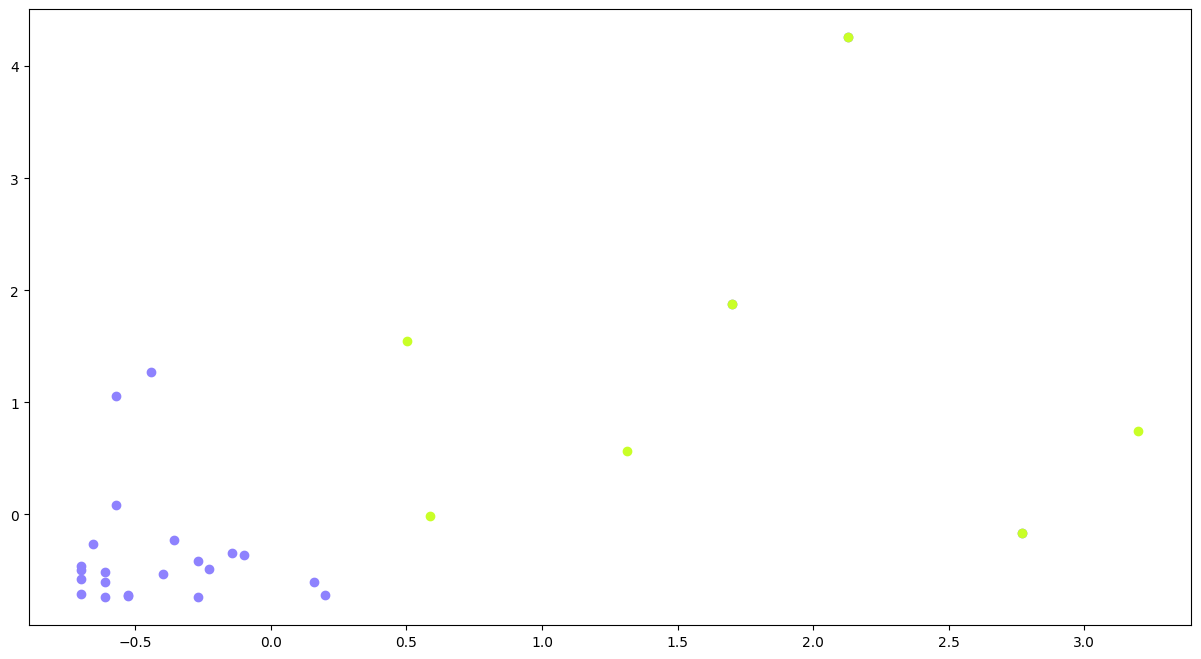

In [28]:
df_wd = df[df['target'] == 'working_day']
df_weekend = df[df['predict'] == 'weekend']
plt.subplots(figsize=(15, 8))
plt.scatter(df_wd.am, df_wd.pm, color='xkcd:periwinkle')
plt.scatter(df_weekend.am, df_weekend.pm, color='xkcd:green yellow')
plt.show()

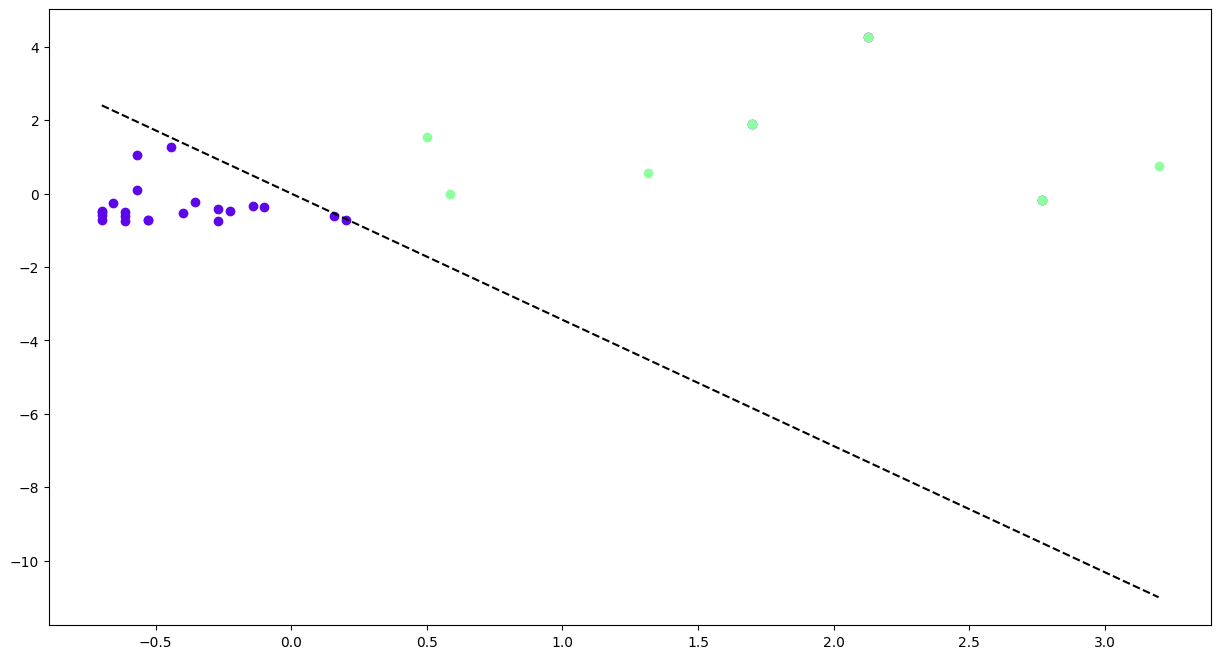

In [30]:
plt.subplots(figsize=(15, 8))

df_wd = df[df['target'] == 'working_day']
df_weekend = df[df['predict'] == 'weekend']

X = df[['am', 'pm']]
y = df.target
logreg = LogisticRegression(fit_intercept=False, random_state=21)
logreg.fit(X,y)

b = logreg.intercept_[0]
w1, w2 = logreg.coef_.T
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary.
xmin, xmax = min(X.am), max(X.am)
ymin, ymax = min(X.pm), max(X.pm)
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', ls='--')
plt.scatter(df_wd.am, df_wd.pm, color='xkcd:blue violet')
plt.scatter(df_weekend.am, df_weekend.pm, color='xkcd:mint green')


plt.show()

## 3. SVM

1. Apply `SVC` model to the scaled dataframe using parameters `probability=True`, `random_state=21`.
2. Calculate `accuracy`.
3. Try different kernels, find the best in terms of accuracy.
4. Draw both plots again with the decisions boundary to see how this algorithm works.

In [34]:
clf = svm.SVC(kernel='rbf', probability=True, random_state=21)
svc = clf.fit(X,y)
y_svm = svc.predict(X)
accuracy_score(y, y_scaled)

0.7428571428571429

In [36]:
clf = svm.SVC(kernel='poly', probability=True, random_state=21)
svc = clf.fit(X,y)
y_svm = svc.predict(X)
accuracy_score(y, y_scaled)

0.7428571428571429

In [35]:
clf = svm.SVC(kernel='linear', probability=True, random_state=21)
svc = clf.fit(X,y)
y_svm = svc.predict(X)
accuracy_score(y, y_scaled)

0.7428571428571429

In [37]:
clf = svm.SVC(kernel='sigmoid', probability=True, random_state=21)
svc = clf.fit(X,y)
y_svm = svc.predict(X)
accuracy_score(y, y_scaled)

0.7428571428571429

In [39]:
df['predict'] = y_svm
df

,date,am,pm,target,predict
0,2020-04-17,0.200690,-0.719904,working_day,working_day
1,2020-04-18,-0.655914,-0.071822,weekend,working_day
2,2020-04-19,0.072199,-0.592251,weekend,working_day
3,2020-04-20,-0.613084,-0.513696,working_day,working_day
4,2020-04-21,-0.698744,-0.494057,working_day,working_day
5,2020-04-22,-0.698744,-0.464599,working_day,working_day
6,2020-04-23,-0.270442,-0.415502,working_day,working_day
7,2020-04-24,-0.613084,-0.602071,working_day,working_day
8,2020-04-25,0.586162,-0.012906,weekend,working_day
9,2020-04-26,0.500501,1.548382,weekend,weekend


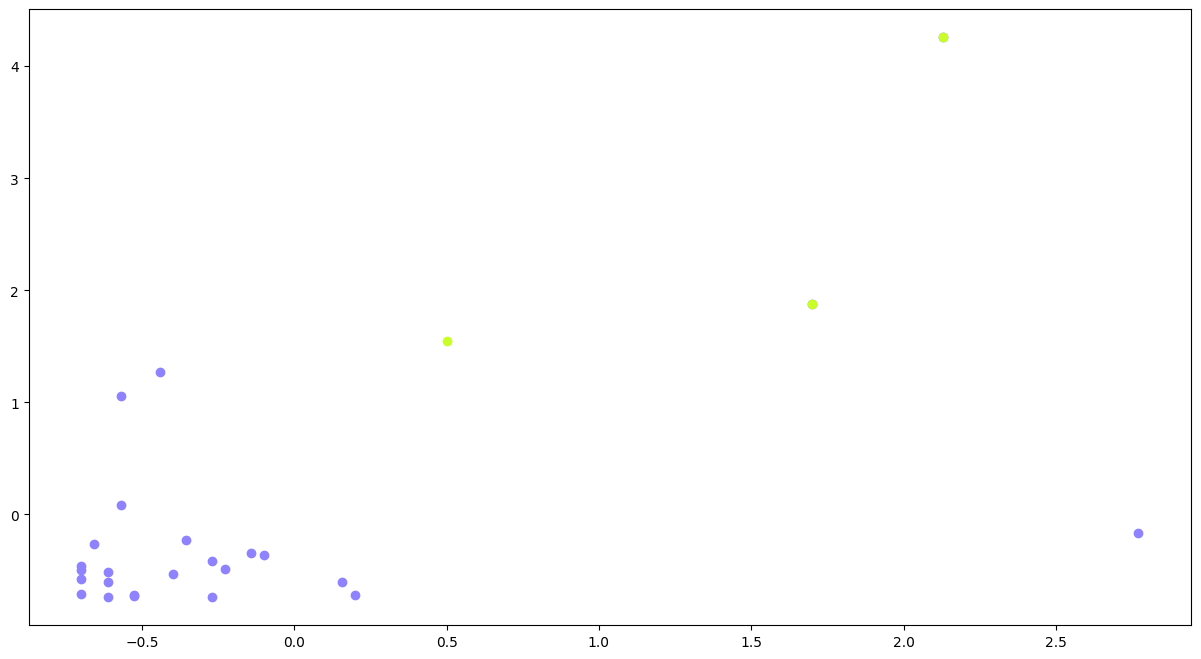

In [40]:
df_wd = df[df['target'] == 'working_day']
df_weekend = df[df['predict'] == 'weekend']
plt.subplots(figsize=(15, 8))
plt.scatter(df_wd.am, df_wd.pm, color='xkcd:periwinkle')
plt.scatter(df_weekend.am, df_weekend.pm, color='xkcd:green yellow')
plt.show()

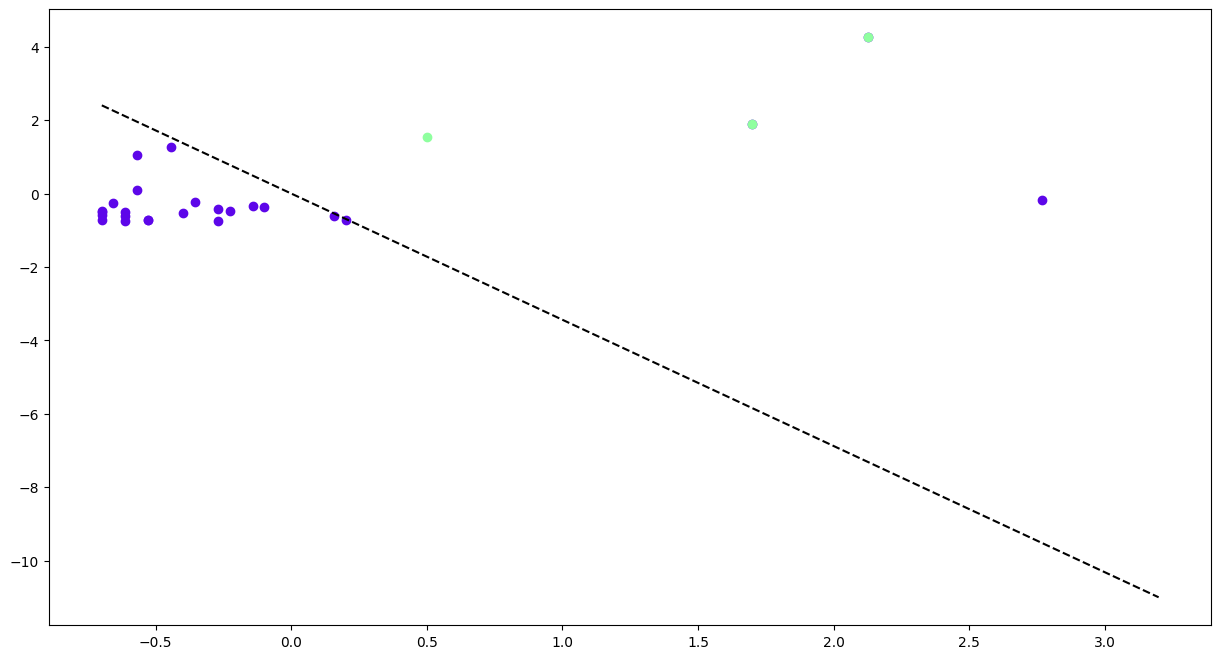

In [41]:
plt.subplots(figsize=(15, 8))

df_wd = df[df['target'] == 'working_day']
df_weekend = df[df['predict'] == 'weekend']

X = df[['am', 'pm']]
y = df.target
logreg = LogisticRegression(fit_intercept=False, random_state=21)
logreg.fit(X,y)

b = logreg.intercept_[0]
w1, w2 = logreg.coef_.T
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary.
xmin, xmax = min(X.am), max(X.am)
ymin, ymax = min(X.pm), max(X.pm)
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', ls='--')
plt.scatter(df_wd.am, df_wd.pm, color='xkcd:blue violet')
plt.scatter(df_weekend.am, df_weekend.pm, color='xkcd:mint green')


plt.show()

## 4. Decision tree

1. Apply `DecisionTreeClassifier` to the scaled dataframe using parameters `max_depth=4`, `random_state=42`.
2. Calculate accuracy.
3. Try different values of `max_depth`.
4. Draw both plots again with the decisions boundary to see how this algorithm works.
5. Using method `.plot_tree()` visualize the decision tree itself. It is another way of thinking about how the algorithm works.
6. How many leaves in the visualized tree label days as working days? Put your answer in the markdown cell in the end of the section.

In [43]:
X = df[['am', 'pm']]
y = df.target
clf = tree.DecisionTreeClassifier(max_depth=4, random_state=42)
clf = clf.fit(X, y)
y_tree = clf.predict(X)
accuracy_score(y, y_tree)

0.9428571428571428

In [44]:
df['predict'] = y_tree
df

,date,am,pm,target,predict
0,2020-04-17,0.200690,-0.719904,working_day,working_day
1,2020-04-18,-0.655914,-0.071822,weekend,weekend
2,2020-04-19,0.072199,-0.592251,weekend,working_day
3,2020-04-20,-0.613084,-0.513696,working_day,working_day
4,2020-04-21,-0.698744,-0.494057,working_day,working_day
5,2020-04-22,-0.698744,-0.464599,working_day,working_day
6,2020-04-23,-0.270442,-0.415502,working_day,working_day
7,2020-04-24,-0.613084,-0.602071,working_day,working_day
8,2020-04-25,0.586162,-0.012906,weekend,weekend
9,2020-04-26,0.500501,1.548382,weekend,weekend


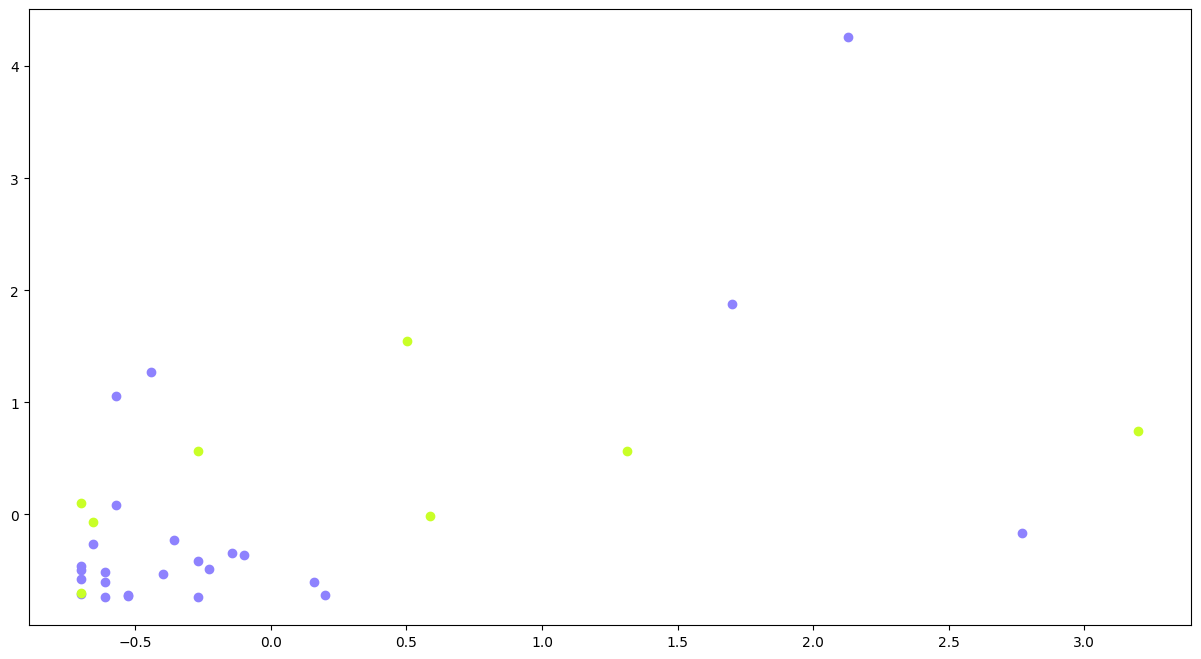

In [45]:
df_wd = df[df['target'] == 'working_day']
df_weekend = df[df['predict'] == 'weekend']
plt.subplots(figsize=(15, 8))
plt.scatter(df_wd.am, df_wd.pm, color='xkcd:periwinkle')
plt.scatter(df_weekend.am, df_weekend.pm, color='xkcd:green yellow')
plt.show()

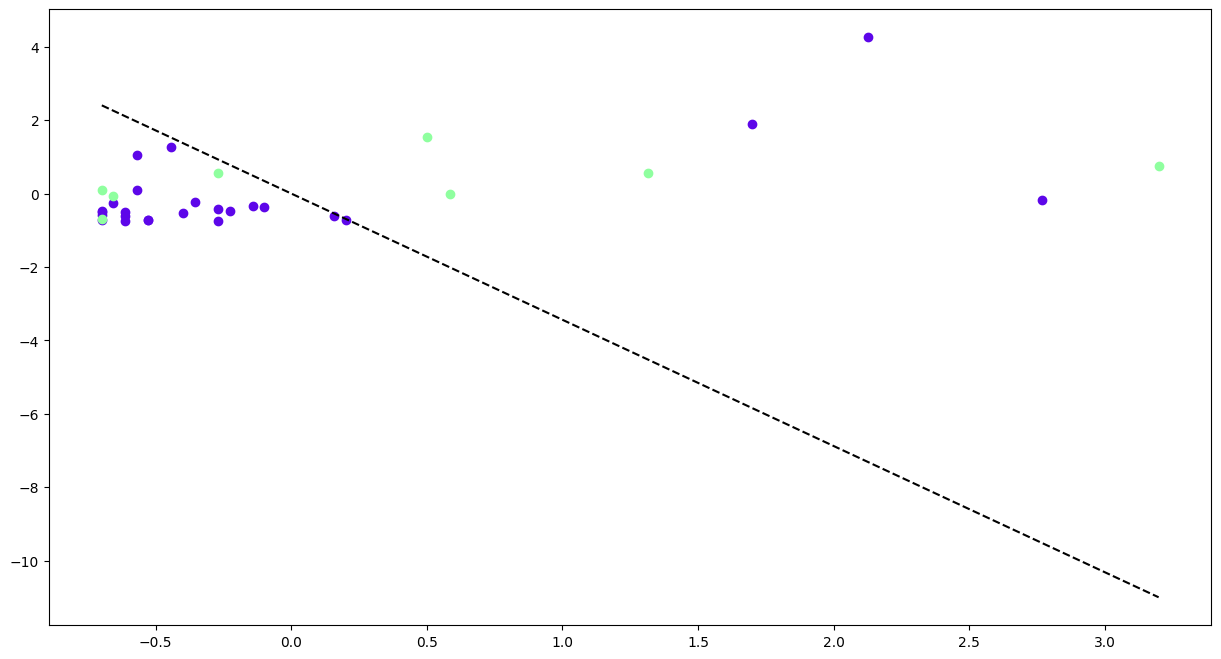

In [46]:
plt.subplots(figsize=(15, 8))

df_wd = df[df['target'] == 'working_day']
df_weekend = df[df['predict'] == 'weekend']

X = df[['am', 'pm']]
y = df.target
logreg = LogisticRegression(fit_intercept=False, random_state=21)
logreg.fit(X,y)

b = logreg.intercept_[0]
w1, w2 = logreg.coef_.T
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary.
xmin, xmax = min(X.am), max(X.am)
ymin, ymax = min(X.pm), max(X.pm)
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', ls='--')
plt.scatter(df_wd.am, df_wd.pm, color='xkcd:blue violet')
plt.scatter(df_weekend.am, df_weekend.pm, color='xkcd:mint green')


plt.show()

[Text(0.40625, 0.9, 'X[1] <= -0.121\ngini = 0.408\nsamples = 35\nvalue = [10, 25]\nclass = weekend'),
 Text(0.125, 0.7, 'X[1] <= -0.705\ngini = 0.227\nsamples = 23\nvalue = [3, 20]\nclass = weekend'),
 Text(0.0625, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = weekend'),
 Text(0.1875, 0.5, 'X[1] <= -0.651\ngini = 0.291\nsamples = 17\nvalue = [3, 14]\nclass = weekend'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = working_day'),
 Text(0.25, 0.3, 'X[0] <= -0.013\ngini = 0.219\nsamples = 16\nvalue = [2, 14]\nclass = weekend'),
 Text(0.1875, 0.1, 'gini = 0.142\nsamples = 13\nvalue = [1, 12]\nclass = weekend'),
 Text(0.3125, 0.1, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = weekend'),
 Text(0.6875, 0.7, 'X[1] <= 0.9\ngini = 0.486\nsamples = 12\nvalue = [7, 5]\nclass = working_day'),
 Text(0.5625, 0.5, 'X[0] <= -0.42\ngini = 0.245\nsamples = 7\nvalue = [6, 1]\nclass = working_day'),
 Text(0.5, 0.3, 'X[0] <= -0.613\ngini = 0.444\nsamples = 3\nvalue = [2,

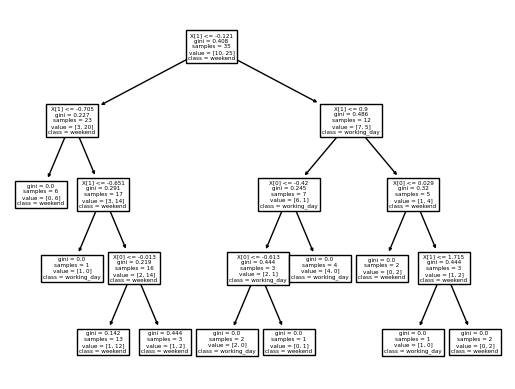

In [55]:
plot_tree(clf, class_names=y)

7